## Time Series Analysis and Prediction

This project deals with prediction of consumption of electricity in the coming future. Time series analysis is important to know trend seasonality and other characteristics of the data for efficient modelling.

The dataset is downloaded from kaggle [here.](https://www.kaggle.com/datasets/kandij/electric-production)


## About Dataset
The dataset has 2 columns which represents date and consumption percentage.

Import Libraries and load the dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
# set plot size
rcParams['figure.figsize'] = 10, 6
# read data
folder_path = '/content/drive/MyDrive/ETE_projects/time_series/'
df = pd.read_csv(folder_path+ 'Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


## Visualize the data

In [ ]:
def visualization(data):
  print(data.info())
  print('-------------------------------------------------------')
  print(data.shape)
  print('-------------------------------------------------------')
  print(data.isnull().sum())

visualization(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None
-------------------------------------------------------
(397, 1)
-------------------------------------------------------
IPG2211A2N    0
dtype: int64


In [ ]:
df['DATE'] = pd.to_datetime(df.DATE)
# df.reset_index(inplace = True)
df = df.set_index(df.DATE)
df.drop('DATE', axis=1, inplace=True)
# print(df.dtypes)
# df.head()

In [ ]:
dd = df.copy(deep=True)
dd['dif_1'] = dd.diff(1)
dd['dif_2'] = dd['IPG2211A2N'].diff(2)
dd.head()

,IPG2211A2N,dif_1,dif_2
DATE,,,
1985-01-01,72.5052,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN
1985-03-01,62.4502,-8.2218,-10.0550
1985-04-01,57.4714,-4.9788,-13.2006
1985-05-01,55.3151,-2.1563,-7.1351


In [ ]:
df.tail(3)

,IPG2211A2N
DATE,
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


## Plot Trend and Seasonality

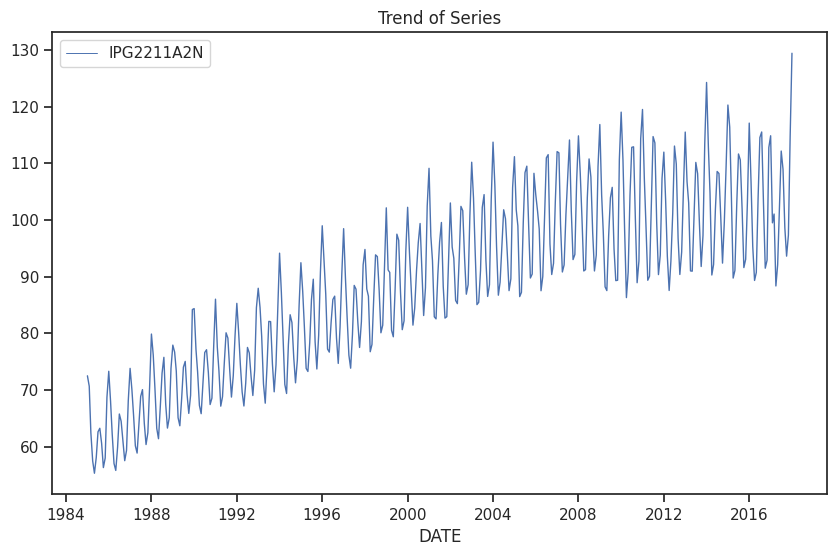

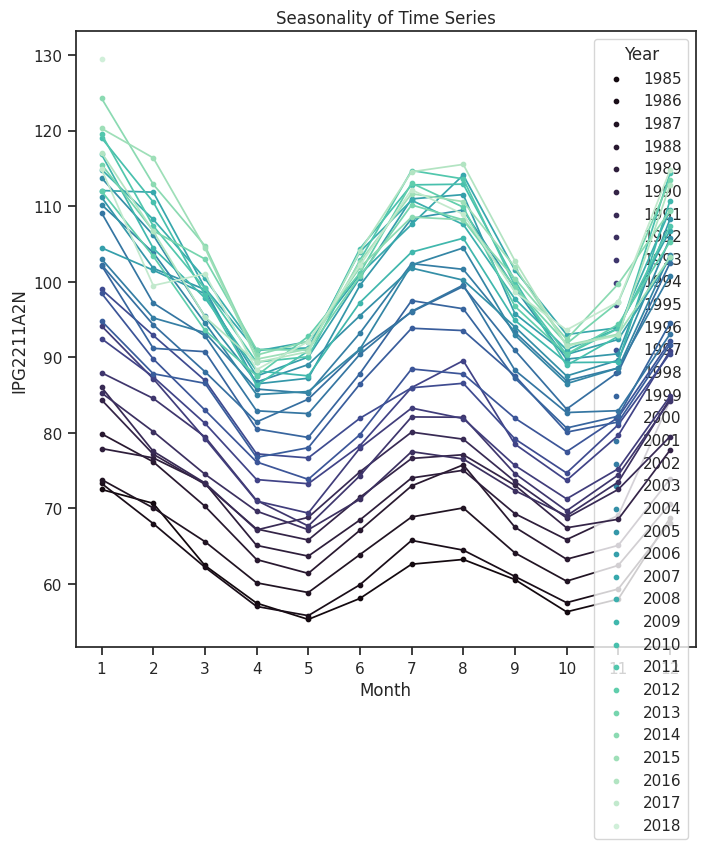

In [ ]:
## Time series Characteristics
def characteristics(data, x, y, title):
  ax = sns.lineplot(data = data, lw=1)
  ax.lines[0].set_linestyle('solid')
  ax.set_title(title)

  df_temp = data.copy()
  df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
  df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
  # Stacked Line Plot
  plt.figure(figsize=(8,8))
  plt.title('Seasonality of Time Series')
  sns.set(style="ticks", rc={"lines.linewidth": 0.7})
  sns.pointplot(x='Month', y= 'IPG2211A2N', hue='Year', data = df_temp,palette='mako', linestyles='-' )

characteristics(df, 'DATE', 'IPG2211A2N','Trend of Series')

<pre>
We observe upward trend the graph.
There is also slight increase in the variance over time.(Length of the spikes)
We also observe that the data is seasonal and there is dip during April-May(4–5) and rise
during July-August(7–8) and November- December(11–12)
The data is seasonal yearly as well as half-yearly.

## Check for Stationarity

A time series is said to be stationary if the mean, variance and autocorrelation does not vary over time.

Trend, seasonality and other characteristics varying according to time
 will affect modelling as underlying pattern of the data is not learnt by the model due to non-stationarity. Thus stationarity needs to be achieved.

The following are the methods for stationarity test:

- Rolling Window Analysis
- Dickey Fuller Test

<b>Rolling Window Analysis</b>

- It refers to calculating the values based on previous ‘window size’ of values. It analyses if the variation is time dependent and
if yes for what size of the window.
- This helps use to know the nature of coefficients of the data with respect to time. Our aim is to achieve parameter stability of the data.
- As we have found that the data is seasonal in the above graph,
we set the window size = 12.

<b>Augmented Dickey Fuller Test</b>

On an explanatory perspective,

- Null hypothesis H0 implies that unit root=1, the time series is not stationary.
- Alternate hypothesis H1 implies that unit root <1, and the series is stationary.

We us test statistic value, critical values at 1%, 5% and 10% confidence intervals and p value for evaluating the test results.

When the test statistic < = critical values, p value < 0.05 indicates that null hypothesis can be rejected and data is stationary.
<pre>

### Stationarity Test

In [ ]:
sns.set_style('whitegrid')
col = 'IPG2211A2N'
def stationarity_test(data, window, title, col_name):
  data['r_mean'] = data[col_name].rolling(window = window).mean()
  data['r_std'] = data[col_name].rolling(window=window).std()
  # Plot rolling statistic
  ax = sns.lineplot(data = data, lw=1, palette=['navy', 'darkgreen', 'red'])
  ax.lines[0].set_linestyle('solid')
  ax.set_title(title)
  # Dickey Fuller test
  df_test = adfuller(data[col_name])
  df_output = pd.Series(df_test[0:4], index=['Test Statistic',
                                             'p-value',
                                             'Lags used for t-statistic',
                                             'No_of_observation_used'])
  for key, value in df_test[4].items():
    df_output['Critical value(%s)'%key] = value
  print(df_output)

Test Statistic                -2.256990
p-value                        0.186215
Lags used for t-statistic     15.000000
No_of_observation_used       381.000000
Critical value(1%)            -3.447631
Critical value(5%)            -2.869156
Critical value(10%)           -2.570827
dtype: float64


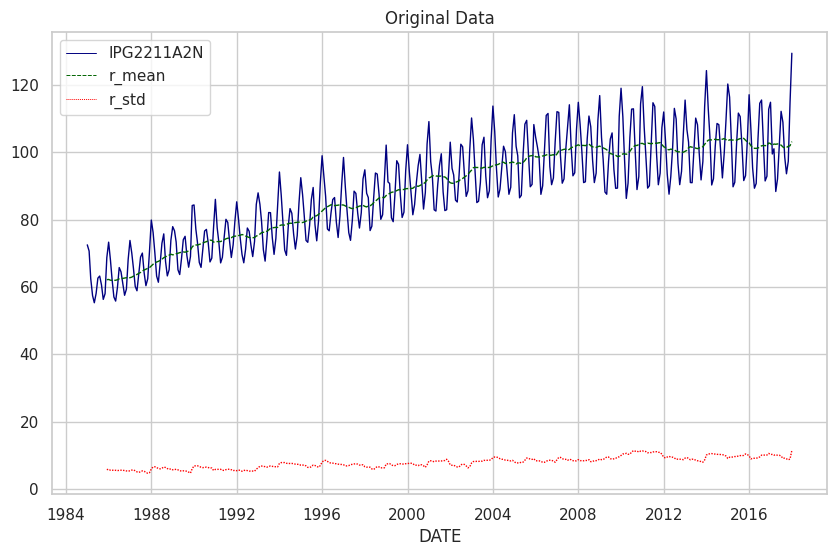

In [ ]:
stationarity_test(df, 12, 'Original Data',col)

_ We observe that standard deviation is some what constant, but mean is not constant.

- T values corresponding to ADF test. Since critical value -2.25>-3.44,-2.86,-2.57 (t-values at 1%,5%and 10% confidence intervals), null hypothesis cannot be rejected.
- Hence there is non stationarity in the data.
- Also p-value of 0.18>0.05(if we take 5% significance level or 95% confidence interval), null hypothesis is accepted.
- Hence data is non stationary (that means it has relation with time)

## Converting Non-Stationary Data into Stationary Data
Differencing, mathematical transformations like log, weighted moving average or combination of these methods can be used to make data stationary.

### Differencing
It refers to substracting the value with its previous value(positive lag) in the time series. Lag is specified for differencing.

Differenced data is subjected to stationarity test.

Test Statistic              -7.104891e+00
p-value                      4.077787e-10
Lags used for t-statistic    1.400000e+01
No_of_observation_used       3.810000e+02
Critical value(1%)          -3.447631e+00
Critical value(5%)          -2.869156e+00
Critical value(10%)         -2.570827e+00
dtype: float64


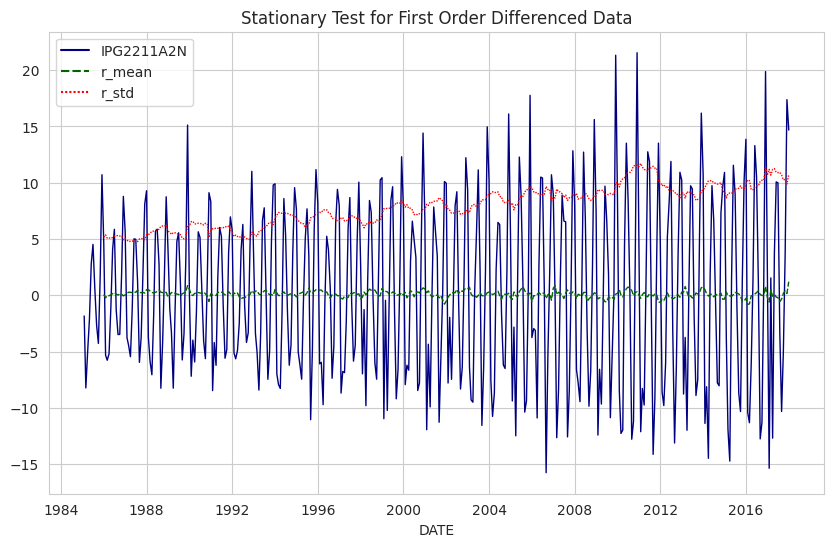

In [ ]:
## Converting Non-Stationary Data into Stationary Data
# Differencing

def differencing(data,order):
  df_diff = data.diff(periods=order)
  # Data transformation may add na values
  df_diff.dropna(inplace=True)
  return df_diff

df_diff = differencing(df, 1)
stationarity_test(df_diff,12, 'Stationary Test for First Order Differenced Data',col )

* There is slight upward trend in standard deviation.
* Test statistic Value is less than (1%, 5%, 10%) critical.
* p-value is lesser than 0.05.
Thus it is stationary series.
* There is variance along with time

### Log Transformation



In [ ]:
def differencing(data,order):
  df_diff = data.diff(periods=order)
  # Data transformation may add na values
  df_diff.dropna(inplace=True)
  return df_diff
df_log = np.log(df)
df_log_diff = differencing(df_log, 1)

Test Statistic                -3.145360
p-value                        0.023373
Lags used for t-statistic     15.000000
No_of_observation_used       381.000000
Critical value(1%)            -3.447631
Critical value(5%)            -2.869156
Critical value(10%)           -2.570827
dtype: float64


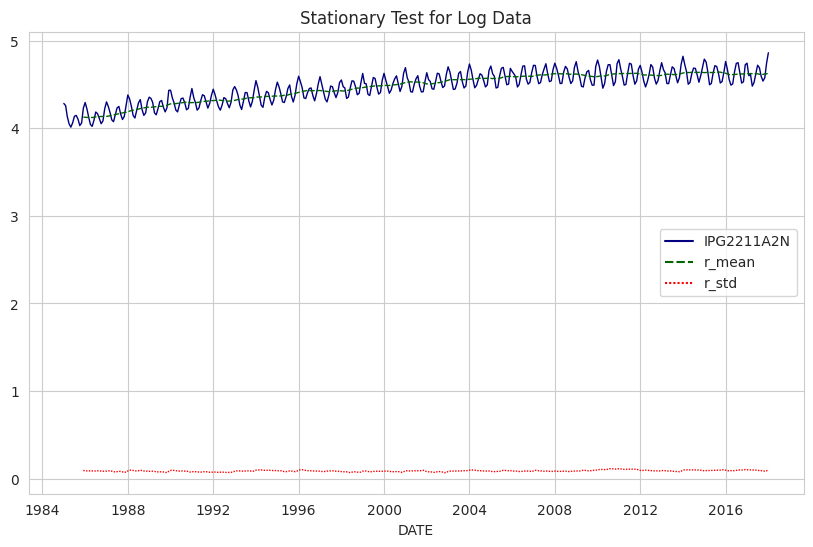

In [ ]:
df_log = np.log(df)
stationarity_test(df_log,12, 'Stationary Test for Log Data',col )

Log transformed series is stationary with 95% confidence only. Test statistic is lesser than 5%(1–0.05 = 0.95) but greater than 1% critical.

### Differencing Log Data

Test Statistic              -6.654626e+00
p-value                      5.020330e-09
Lags used for t-statistic    1.400000e+01
No_of_observation_used       3.700000e+02
Critical value(1%)          -3.448148e+00
Critical value(5%)          -2.869383e+00
Critical value(10%)         -2.570948e+00
dtype: float64


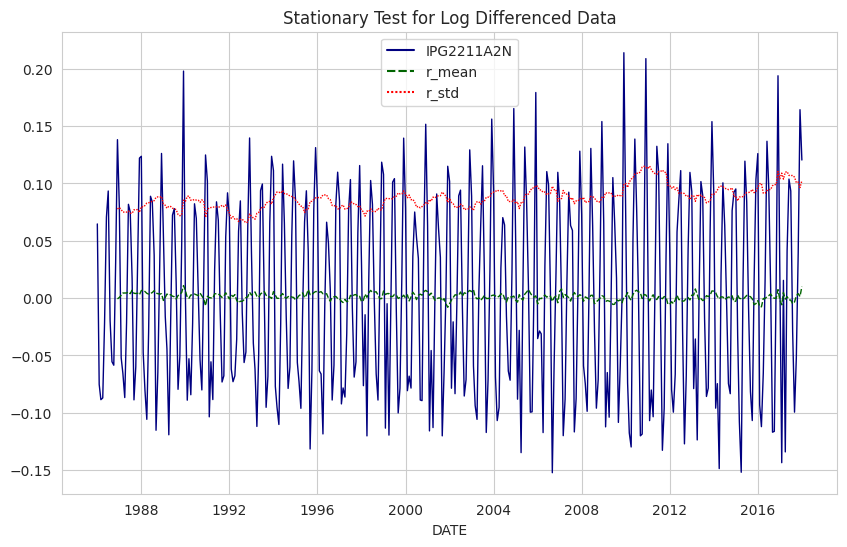

In [ ]:
# First order differencing
df_log_diff = differencing(df_log, 1)
stationarity_test(df_log_diff,12,'Stationary Test for Log Differenced Data',col)

- Log transformed and differenced series is stationary with test statistic is lesser than 1%, 5% and 10% critical.
- p value is less than 0.05.
- mean is constant and standard deviation is slightly varying with no significant trend.

We use log differenced data for modelling. As we have found that the data series is seasonal, we use SARIMAX for modelling.

## SARIMAX
In order to model with SARIMAX we need to find (p,d,q) and seasonal component (P,D,Q) of the series.

- p represents order of auto regression (AR), q represents the order of moving average (MA) and d represents order of differencing.
### ACF and PACF Plots
- PACF graph indicates the correlation of the y and lag y at t after removing the effect of previous lags where t represents the lag order.
- ACF graph indicates the correlation of the lag y with its own lags at order t.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df_log_diff

,IPG2211A2N,r_mean,r_std
DATE,,,
1986-01-01,0.064678,NaN,NaN
1986-02-01,-0.075323,NaN,NaN
1986-03-01,-0.088605,NaN,NaN
1986-04-01,-0.087082,NaN,NaN
1986-05-01,-0.021609,NaN,NaN
...,...,...,...
2017-09-01,-0.099489,-0.003434,0.105466
2017-10-01,-0.052051,0.001915,0.100747
2017-11-01,0.038991,0.003896,0.101265


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


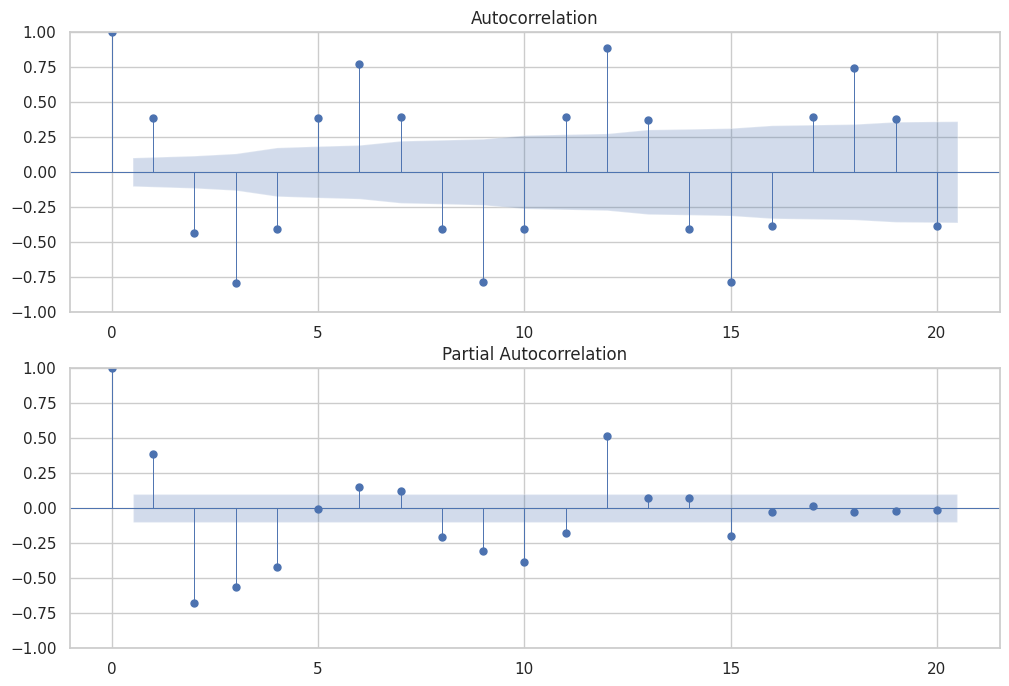

In [ ]:
# acf to see if there is direct impact or indirect impact
# finding q :
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_log_diff[col].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_log_diff[col].iloc[13:],lags=20,ax=ax2)

https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa

<pre>
q=3 as we find significant lag at 3 and not beyond in ACF.
p=4 as initially 4 lags are significant in PACF graph.
</pre>

### Finding PQD order for sarimax is the seasonal component

<pre>
We decompose the time series data into components to visualize the characteristics.
 Multiplicative model is used as the seasonal variation increases over time.
</pre>

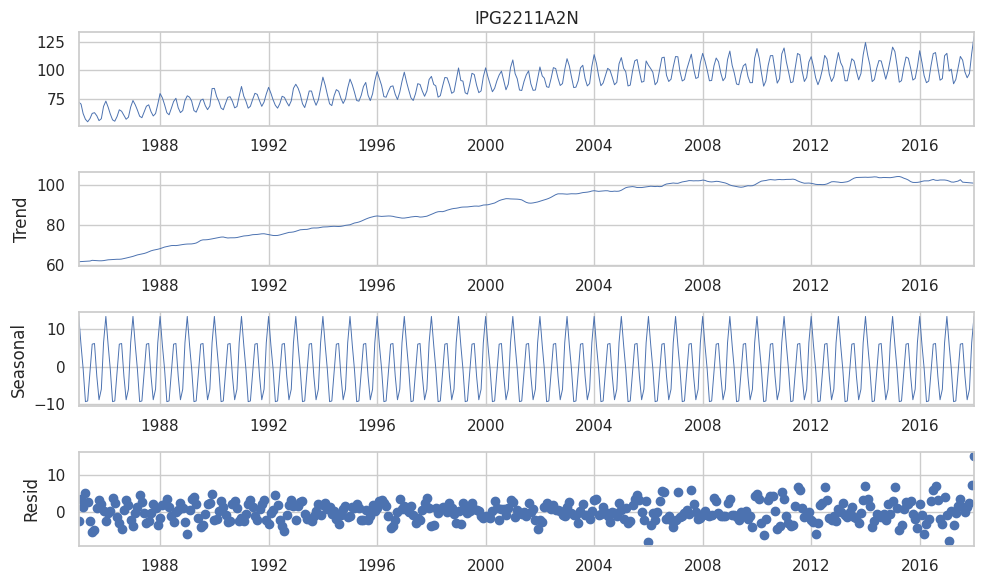

In [ ]:
# Experiment with additive model
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df[col], model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

* In order to evaluate the seasonal order, we must extract the seasonal component from the time series.
* In order to extract D, we have to check whether the seasonal componenet is stationary or not.

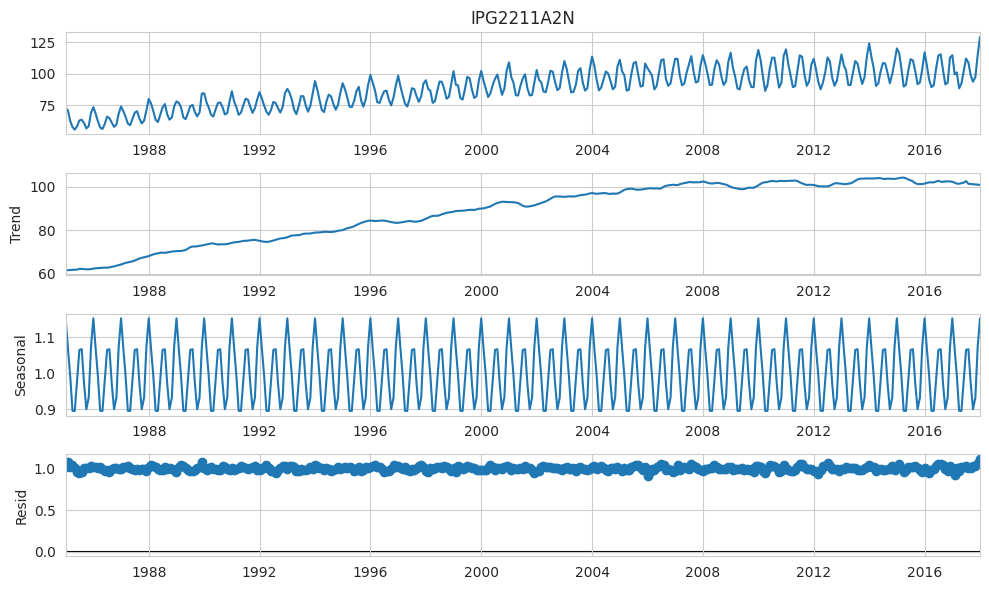

In [ ]:
col = 'IPG2211A2N'
sns.set_style('whitegrid')
from statsmodels.tsa.seasonal import seasonal_decompose
result_m = seasonal_decompose(df[col], model='multiplicative',extrapolate_trend='freq')
result_m.plot()
plt.show()

In [ ]:
# multiplicative
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

seasonal_a = result_m.seasonal
check_stationarity(seasonal_a)

The series is stationary


### Plot ACF and PACF for seasonal component.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


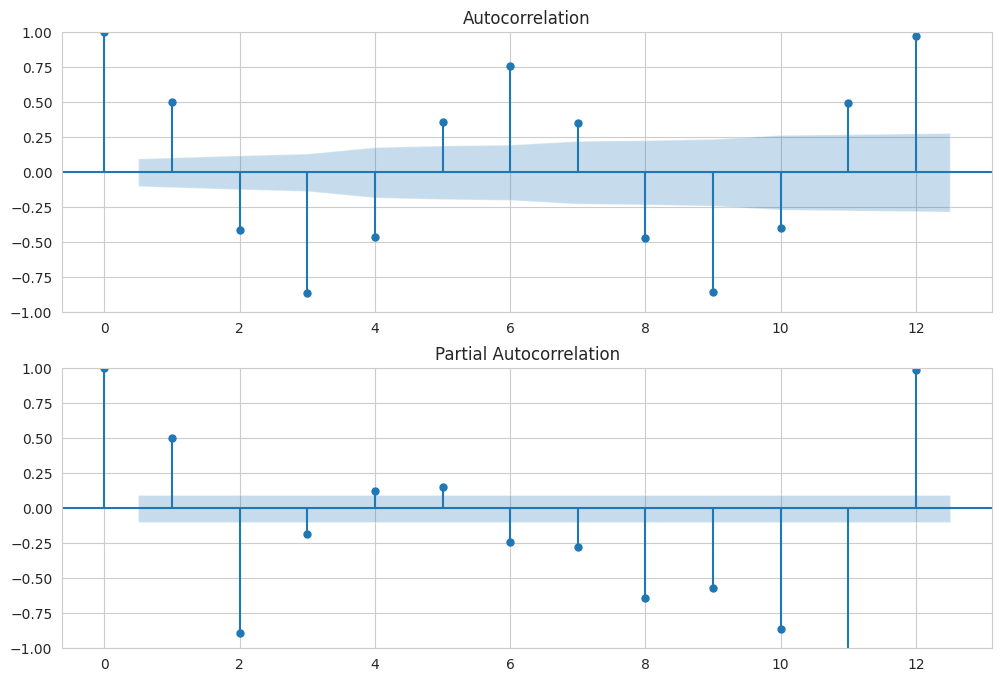

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(seasonal_a,lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonal_a,lags=12,ax=ax2)

- All the lags are outside confidence interval in ACF. So we consider Q=6 after which it is cyclic in nature.
- P=3 is chosen considering lags at 1,2 and 6 in PACF graph.
- D=0 as we are not differencing the seasonal components.

## Modelling using SARIMAX

### Train test split

In [ ]:
df_train = df_log[:278]
df_test = df_log[279:]

In [ ]:
df_b = df_log.copy(deep=True)

### Fit and plot the result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimizat

<Axes: xlabel='DATE', ylabel='IPG2211A2N'>

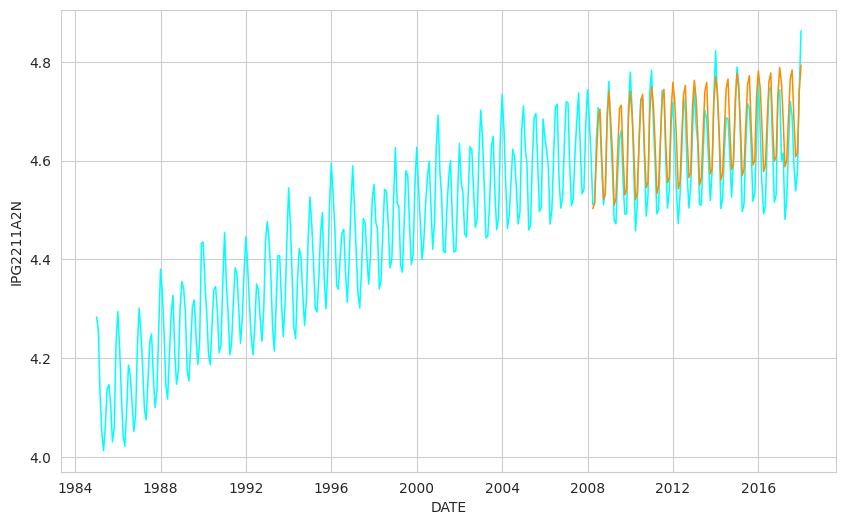

In [ ]:
model_b = sm.tsa.statespace.SARIMAX(df_train['IPG2211A2N'],order=(4,1,3), seasonal_order = (3, 0, 6,12))
results_b = model_b.fit()
pred_b= results_b.predict(start = df_test.index[0], end = df_test.index[-1])
df_test['pred_b'] = pred_b.values
sns.lineplot(data = df_b, x = df_b.index, y = col, color='aqua', lw=1.1)
sns.lineplot(data = df_test, x = df_test.index, y = 'pred_b', color='darkorange', lw=1.1)

## Evaluation

- <u>Mean Squared Error(MSE):</u> It is the average of the sum of the squares of the distance
between actual values and predicted values. Lower values indicates the forecast is closer to actual.
- <u>Root mean squared error(RMSE):</u> It is square root of MSE. It is the average of difference between the predicted and actual values. It represents the accuracy of the prediction.
- Both MSE and RMSE is used to measure accuracy.
- <u>Mean absolute error:</u> It is average of the sum of absolute difference between original and predicted values.

### Residual Diagnostic Plots
Residuals refers to the difference obtained by substracting predicted value from actual value.

mse: 0.0027275147772720886
rmse: 0.052225614187600404


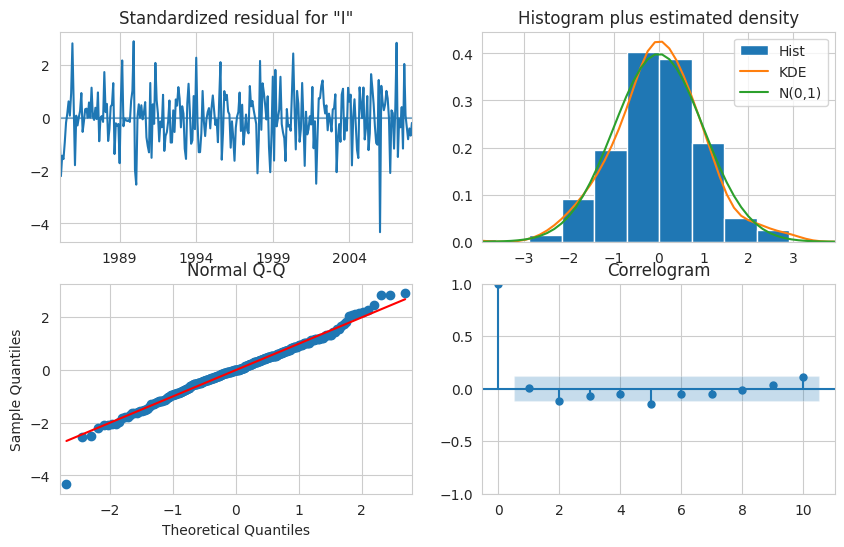

In [ ]:
mse = mean_squared_error(df_test[col], df_test['pred_b'])
print('mse:',mse)
rmse = np.sqrt(mean_squared_error(df_test[col], df_test['pred_b']))
print('rmse:', rmse)
results_b.plot_diagnostics()
plt.show()

* **Standardized residual plot**: This plot does not necessarily have a pattern which indicates that the model is functioning well.

* **Histogram and density plot:** This is the density plot of the residuals. The normal distribution depicted in green and the residual density plot depicted in orange has small differences. If there is no difference it indicates the model is best. Here the model is better.

* **Q_Q Plot:** The distribution of the residuals appears to be normal with few data points at the ends.

* **Correlogram Plot:** The ACF plot of the residuals indicates that there is no significant correlation outside the confidence interval, indicating that most of the information is captured by the model. Thus it is a good model.

### Summary Statisitcs

In [ ]:
mae = np.mean(np.abs(results_b.resid))
# Print mean absolute error
print('MAE: %.3f' % mae)
results_b.summary()

MAE: 0.035


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:                                          IPG2211A2N   No. Observations:                  278
Model:             SARIMAX(4, 1, 3)x(3, 0, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                 624.886
Date:                                             Wed, 21 Jun 2023   AIC                          -1215.771
Time:                                                     10:59:49   BIC                          -1154.163
Sample:                                                 01-01-1985   HQIC                         -1191.052
                                                      - 02-01-2008                                         
Covariance Type:                                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1053      0.317      0.332      0.740      -0.516       0.727
ar.L2         -0.3781      0.259     -1.457      0.145      -0.887       0.130
ar.L3         -0.5971      0.252     -2.374      0.018      -1.090      -0.104
ar.L4         -0.2708      0.092     -2.955      0.003      -0.450      -0.091
ma.L1         -0.3913      0.314     -1.246      0.213      -1.007       0.224
ma.L2          0.3509      0.325      1.080      0.280      -0.286       0.988
ma.L3          0.5533      0.297      1.862      0.063      -0.029       1.136
ar.S.L12      -0.0731      1.667     -0.044      0.965      -3.340       3.194
ar.S.L24       0.3979      0.898      0.443      0.658      -1.362       2.158
ar.S.L36       0.6129      1.534      0.400      0.689      -2.393       3.619
ma.S.L12       0.2854      1.689      0.169      0.866      -3.025       3.595
ma.S.L24      -0.3553      0.853     -0.417      0.677      -2.027       1.316
ma.S.L36      -0.5259      1.451     -0.362      0.717      -3.370       2.318
ma.S.L48       0.1385      0.162      0.856      0.392      -0.179       0.456
ma.S.L60       0.2099      0.379      0.554      0.580      -0.533       0.953
ma.S.L72       0.0361      0.231      0.156      0.876      -0.417       0.489
sigma2         0.0006   5.18e-05     11.288      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                17.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.15
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* The null hypothesis for Ljung-Box test states
that there is no correlation in the residuals.
* Prob(Q) is 0.92>0.05 indicates that null hypothesis is accepted. The residuals are independent and not correlated.
* The null hypothesis for Jarque-Bera test states that the residuals are guassian normally distributed.
* Prob(JB) is 0.00<0.05 indicating that the null hypothesis is rejected.
* Thus the residuals are not normally distributed.

Thus residuals are not correlated and residuals are not normally distributed.

## Prediction with Future Data

In [ ]:
futureDate = pd.DataFrame(pd.date_range(start='2018-02-01', end='2021-01-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
future_df=pd.concat([df_log,futureDate])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: ylabel='IPG2211A2N'>

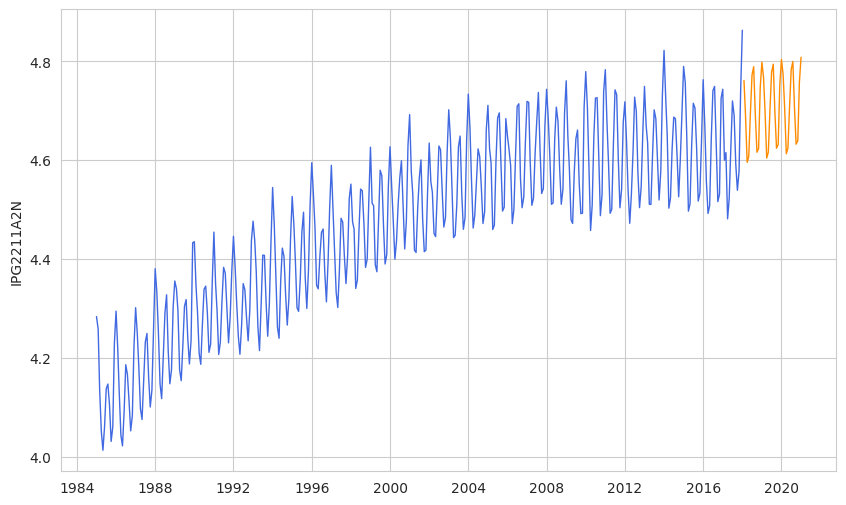

In [ ]:
future_df['forecast_b'] = results_b.predict(start='2018-02-01', end='2021-01-01', dynamic= True)
sns.lineplot(data = future_df, x = future_df.index, y = col, color='royalblue', lw=1)
sns.lineplot(data = future_df, x = future_df.index, y = future_df['forecast_b'], color='darkorange', lw=1)

## Conclusion

The following steps and techniques are applied for this time series forecasting:

* Visualize the data
* Check for stationarity using rolling statistics and augmented dickey fuller test
- Convert non stationary to stationary data by applying tranaformation and differencing techniques.
- find p, d, q using acf, pacf plots
- Seasonal Decomposition using multiplicative model
- Find P D Q values of the seasonal components
- Modelling using SARIMAX
- Evaluation using MSE, RMSE, MAE.
- Interpret Residual Diagnostic Plots
- Interpret Summary Statistics
- Prediction with future data.

### References:

https://www.kaggle.com/code/nholloway/seasonality-and-sarimax/notebook

https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa

https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting/notebook

https://www.jadsmkbdatalab.nl/forecasting-with-sarimax-models/

https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html

https://online.stat.psu.edu/


<pre>
<b> Previous Experiment with Additive Model</b>
</pre>

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


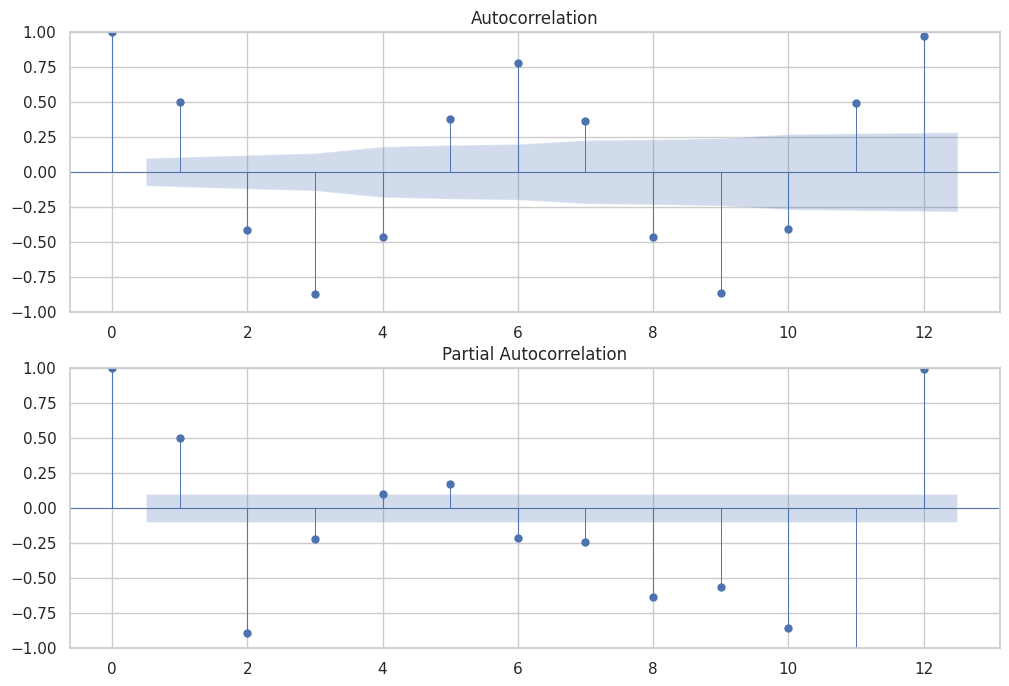

In [ ]:
# P , Q order
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(seasonal,lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonal,lags=12,ax=ax2)

In [ ]:
# D=0, Q=12, P= 11 (p,d,q), (P)
# q=3(significant lag at 3 and not beyond) p=2,3, 4

In [ ]:
# Split time series: train and test test
df_train = df_log[:278]
df_test = df_log[279:]

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df_train['IPG2211A2N'],order=(4,1,3), seasonal_order = (10, 0, 12,12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
df_a = df_log.copy(deep=True)

In [ ]:
pred= results.predict(start = df_test.index[0], end = df_test.index[-1])

In [ ]:
df_test['pred_h'] = pred.values

<ipython-input-25-c70a37c4acd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_h'] = pred.values


<Axes: xlabel='DATE', ylabel='IPG2211A2N'>

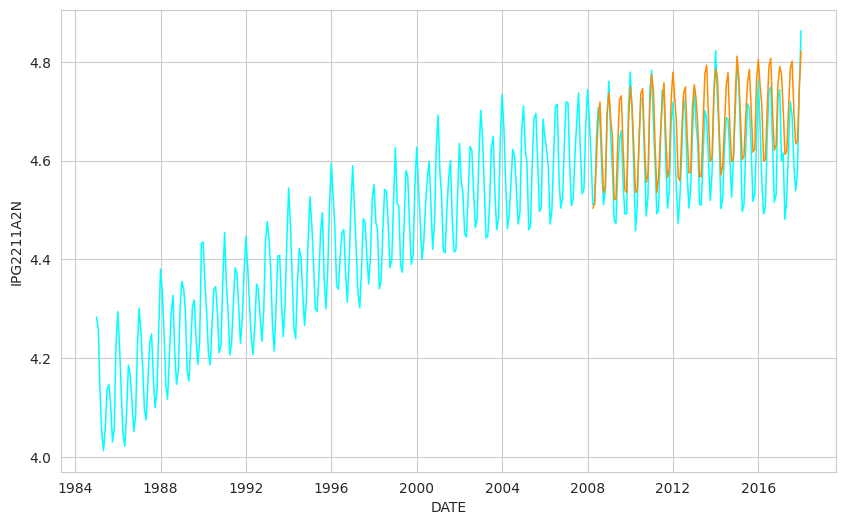

In [ ]:
# final graph
sns.lineplot(data = df_a, x = df_a.index, y = col, color='aqua', lw=1.1)
sns.lineplot(data = df_test, x = df_test.index, y = 'pred_h', color='darkorange', lw=1.1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
df_test.tail()

,IPG2211A2N,r_mean,r_std,pred_f
DATE,,,,
2017-09-01,4.591227,4.613704,0.090198,4.700086
2017-10-01,4.539177,4.615619,0.088161,4.635199
2017-11-01,4.578168,4.619515,0.085080,4.644531
2017-12-01,4.742505,4.620945,0.087140,4.750578
2018-01-01,4.862945,4.630888,0.106964,4.833087


In [ ]:
mse = mean_squared_error(df_test[col], df_test['pred_h'])
mse

0.004284511991662467

In [ ]:
np.sqrt(mean_squared_error(df_test[col], df_test['pred_h']))  #  order=(4,1,3), seasonal_order=(10,0,12,12) error = 0.06545618375419138
                                                              # order=(4,1,3), seasonal_order=(11,0,12,12) error = 0.06554779036705585
                                                                                              #  (7, 0, 12, 12)  = 0.07192878440460916

0.06545618375419138

In [ ]:
df_test.to_csv(folder_path+'/test_res.csv', index=False)

In [ ]:
futureDate = pd.DataFrame(pd.date_range(start='2018-02-01', end='2021-01-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)

<Axes: >

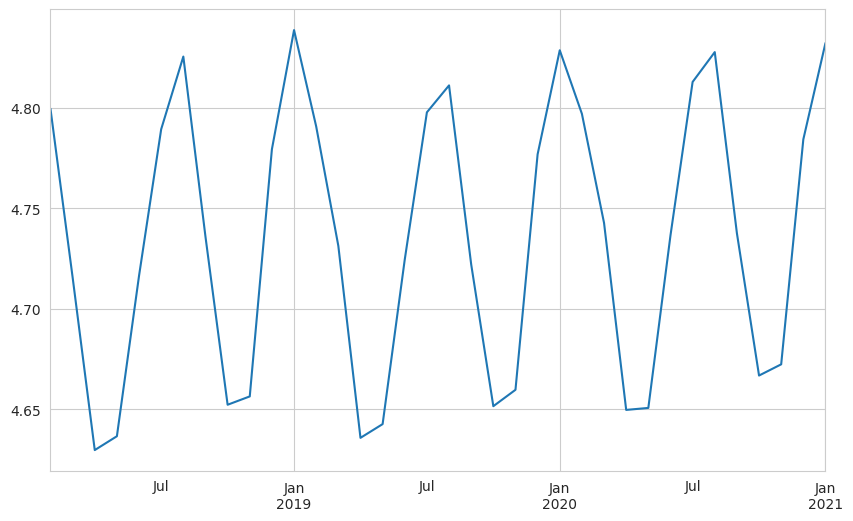

In [ ]:
# add above
results.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot()

In [ ]:
future_df=pd.concat([df,futureDate])
future_df['forecast'] = results.predict(start='2018-02-01', end='2021-01-01', dynamic= True)

<Axes: ylabel='IPG2211A2N'>

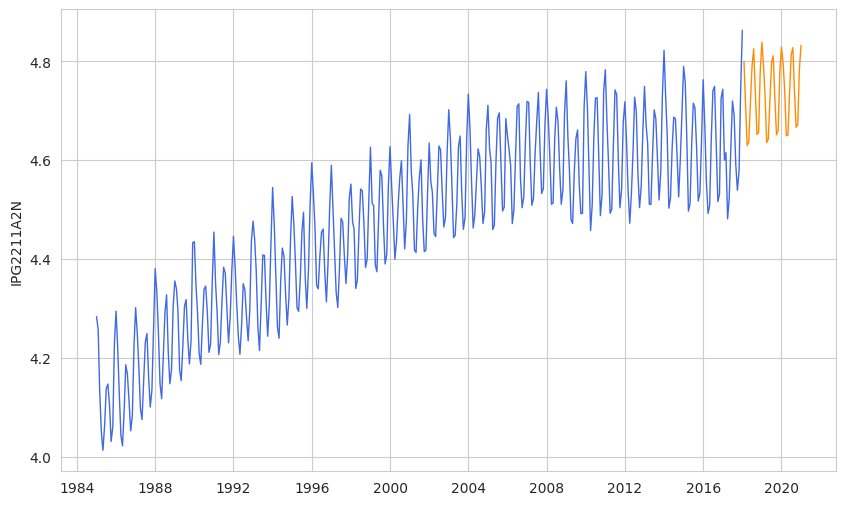

In [ ]:
sns.lineplot(data = future_df, x = future_df.index, y = col, color='', lw=1)
sns.lineplot(data = future_df, x = future_df.index, y = future_df['forecast'], color='darkorange', lw=1)

In [ ]:
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 0.035


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         SARIMAX Results                                                         
=================================================================================================================================
Dep. Variable:                                                                IPG2211A2N   No. Observations:                  278
Model:             SARIMAX(4, 1, 3)x(10, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood                 631.839
Date:                                                                   Fri, 16 Jun 2023   AIC                          -1203.677
Time:                                                                           11:56:53   BIC                          -1094.957
Sample:                                                                       01-01-1985   HQIC                         -1160.055
                                                                            - 02-01-2008                                         
Covariance Type:                                                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2103      0.249      0.846      0.398      -0.277       0.698
ar.L2         -0.5194      0.225     -2.305      0.021      -0.961      -0.078
ar.L3         -0.4473      0.213     -2.096      0.036      -0.865      -0.029
ar.L4         -0.3050      0.082     -3.707      0.000      -0.466      -0.144
ma.L1         -0.4659      0.248     -1.882      0.060      -0.951       0.019
ma.L2          0.3819      0.272      1.407      0.160      -0.150       0.914
ma.L3          0.4637      0.231      2.007      0.045       0.011       0.917
ar.S.L12       0.0125      3.029      0.004      0.997      -5.925       5.950
ar.S.L24      -0.0059      2.084     -0.003      0.998      -4.090       4.078
ar.S.L36       0.0024      2.627      0.001      0.999      -5.147       5.152
ar.S.L48       0.1310      2.697      0.049      0.961      -5.155       5.417
ar.S.L60       0.0954      2.637      0.036      0.971      -5.073       5.264
ar.S.L72       0.0761      2.011      0.038      0.970      -3.866       4.018
ar.S.L84       0.1681      2.439      0.069      0.945      -4.612       4.949
ar.S.L96       0.2523      3.310      0.076      0.939      -6.235       6.739
ar.S.L108     -0.0080      2.574     -0.003      0.998      -5.052       5.036
ar.S.L120      0.1263      1.808      0.070      0.944      -3.417       3.670
ma.S.L12       0.3107      3.015      0.103      0.918      -5.598       6.219
ma.S.L24       0.1503      2.794      0.054      0.957      -5.325       5.626
ma.S.L36       0.1853      3.510      0.053      0.958      -6.694       7.065
ma.S.L48       0.2030      3.856      0.053      0.958      -7.354       7.760
ma.S.L60       0.0667      4.154      0.016      0.987      -8.074       8.208
ma.S.L72       0.0687      2.822      0.024      0.981      -5.463       5.601
ma.S.L84       0.1263      1.815      0.070      0.944      -3.431       3.683
ma.S.L96       0.0240      1.431      0.017      0.987      -2.781       2.829
ma.S.L108     -0.1859      1.276     -0.146      0.884      -2.688       2.316
ma.S.L120     -0.0193      1.646     -0.012      0.991      -3.245       3.206
ma.S.L132      0.2492      0.800      0.311      0.755      -1.319       1.817
ma.S.L144     -0.1683      1.064     -0.158      0.874      -2.254       1.917
sigma2         0.0005   9.95e-05      5.053      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                13.78
Prob(Q)

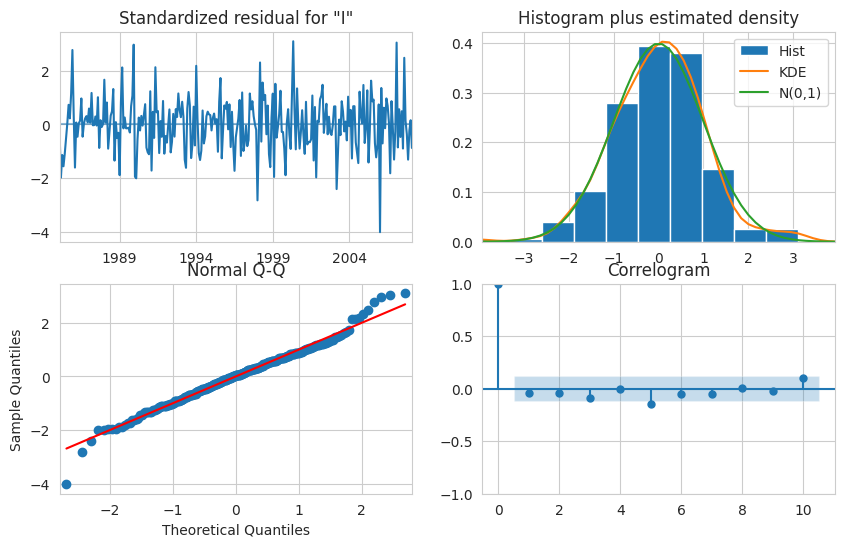

In [ ]:
# Create the 4 diagostics plots using plot_diagnostics method
results.plot_diagnostics()
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse
nrmse = rmse(df_test['pred_h'], df_test[col])/(np.max(df_test[col])-np.min(df_test[col]))
nrmse

0.1615739776646041

In [ ]:
import joblib

# Set model name
filename = folder_path + "/model.pkl"

# Pickle it
joblib.dump(results,filename)

['/content/drive/MyDrive/ETE_projects/time_series//model.pkl']